In [2]:
!pip install keras

  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached h5py-3.14.0-cp312-cp312-win_amd64.whl.metadata (2.7 kB)
  Using cached optree-0.16.0-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupytext 1.17.2 requires mdit-py-plugins, which is not installed.
openai 1.61.0 requires distro<2,>=1.7.0, which is not installed.
openai 1.61.0 requires pydantic<3,>=1.9.0, which is not installed.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/50


D:\python3127\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.1859
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0268
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0216
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0216
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0248
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0182
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0165
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0169
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0150
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0174
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0166
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0151
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0139
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0133
Epoch 16/50
12

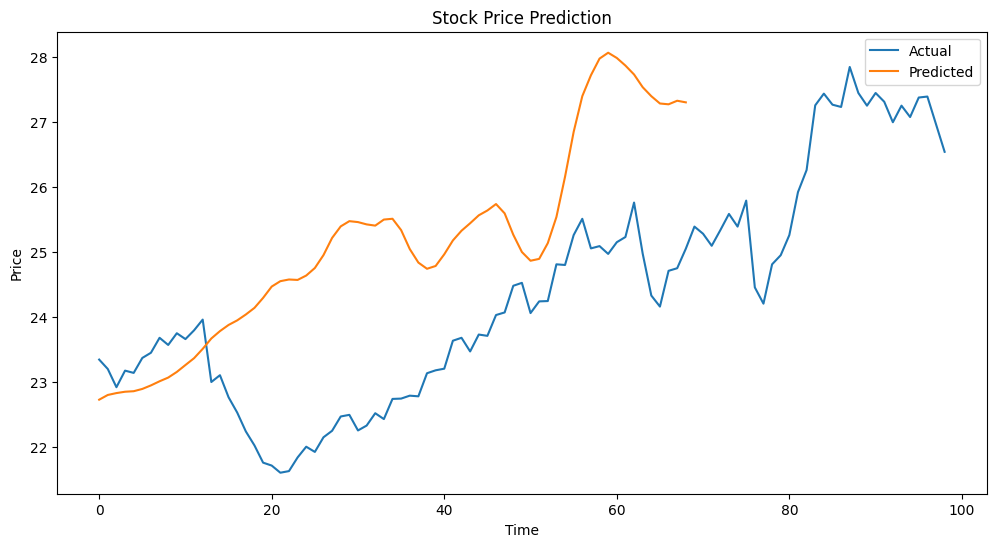

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load the dataset
df = pd.read_csv('https://datatraining.site/data/GLE-PA-data.csv')

# Prepare the data
data = df['Close'].values
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size, :]
test_data = data_scaled[train_size:, :]

# Create input and output sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Choose an appropriate sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data[train_size:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()